# _Physician Compare National_

The following data was gathered via [Data.Medicare.gov](https://data.medicare.gov/Physician-Compare/Physician-Compare-National-Downloadable-File/mj5m-pzi6) and contains general information about individual eligible professionals (EPs) such as demographic information and Medicare quality program participation. This dataset is updated twice a month with the most current demographic information available at that time.

In [2]:
import pandas as pd
from sodapy import Socrata

In [4]:
client = Socrata("data.medicare.gov", "BzzaXP3DJStZ0f7YYeRiwe8OP")

In [9]:
%time
results = client.get("mj5m-pzi6", limit=3000000)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


In [10]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [11]:
results_df.shape

(2210790, 38)

In [12]:
results_df.head()

,adr_ln_1,adr_ln_2,assgn,cred,cty,frst_nm,gndr,grd_yr,hosp_afl_1,hosp_afl_2,...,phn_numbr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,st,suff,zip
0,1850 TOWN CTR PKWY,NaN,Y,NaN,RESTON,ARDALAN,M,1994,490112,210028,...,7036899039,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,201903219
1,1701 N GEORGE MASON DR,NaN,Y,NaN,ARLINGTON,ARDALAN,M,1994,490112,210028,...,7035586161,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,222053610
2,24440 STONE SPRINGS BLVD,NaN,Y,NaN,DULLES,ARDALAN,M,1994,490112,210028,...,5713674400,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,201662247
3,1401 JOHNSTON WILLIS DR,NaN,Y,NaN,NORTH CHESTERFIELD,ARDALAN,M,1994,490112,210028,...,8044835000,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,232354730
4,411 W RANDOLPH RD,NaN,Y,NaN,HOPEWELL,ARDALAN,M,1994,490112,210028,...,8045411600,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,238602938


In [13]:
results_df.to_csv('physician_compare_national.csv', index=False)

Ok, so what did I just do? 

In simple terms, I downloaded the physician data from [data.medicare.gov](https://data.medicare.gov/) via the [Socrata Open Data API](https://dev.socrata.com/). The first step was to register an account and then create an [app token](https://dev.socrata.com/docs/app-tokens.html), which identifies the application for which the data will be used. Having this token gives us guaranteed access to a unique pool of API requests, versus a limited number of requests available to those that access the data without the token. Seeing as I'm doing this only once (not repeatedly) it probably wouldn't have been an issue if I had not created one but I figured I need all the practice with API's that I can get!

The `results` variable stores the results of our request to `"mj5m-pzi6"`, which is the location of the data set. Where did we get this from? See the URL below:

`https://data.medicare.gov/Physician-Compare/Physician-Compare-National-Downloadable-File/mj5m-pzi6`

Notice the ending? It's the same! From a high-level perspective `"mj5m-pzi6"` serves as an ID for this particular data set so by feeding it to `get`, our API client knows where to look. Additionally, the data set is comprised of over 2.21 **million** rows, so I set an arbitrary limit of 3 million to make sure all information was gathered. 

The results of the request are returned as a JSON and then converted to a Python list of dictionaries by `sodapy`. From there, we can pass the results to `pandas` which will then generate a DataFrame! 

As I mentioned earlier, I only wanted to make one initial API request, so at the very end I decided to convert the `pandas` DataFrame into a CSV so we have the data set on hand for slightly easier access.

# _Diving into the Data!_

In [17]:
# replicate data in a new variable
data = results_df.copy()

In [18]:
# we don't want to limit the number of columns printed out by Jupyter
pd.options.display.max_columns = None

# check out the first five rows
data.head()

,adr_ln_1,adr_ln_2,assgn,cred,cty,frst_nm,gndr,grd_yr,hosp_afl_1,hosp_afl_2,hosp_afl_3,hosp_afl_4,hosp_afl_5,hosp_afl_lbn_1,hosp_afl_lbn_2,hosp_afl_lbn_3,hosp_afl_lbn_4,hosp_afl_lbn_5,ind_enrl_id,ind_pac_id,ln_2_sprs,lst_nm,med_sch,mid_nm,npi,num_org_mem,org_lgl_nm,org_pac_id,phn_numbr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,st,suff,zip
0,1850 TOWN CTR PKWY,NaN,Y,NaN,RESTON,ARDALAN,M,1994,490112,210028,NaN,NaN,NaN,CJW MEDICAL CENTER,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,I20130530000085,7517003643,NaN,ENKESHAFI,OTHER,NaN,1003000126,182,EMERGENCY MEDICINE ASSOCIATES PA PC,8022914522,7036899039,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,201903219
1,1701 N GEORGE MASON DR,NaN,Y,NaN,ARLINGTON,ARDALAN,M,1994,490112,210028,NaN,NaN,NaN,CJW MEDICAL CENTER,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,I20130530000085,7517003643,NaN,ENKESHAFI,OTHER,NaN,1003000126,182,EMERGENCY MEDICINE ASSOCIATES PA PC,8022914522,7035586161,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,222053610
2,24440 STONE SPRINGS BLVD,NaN,Y,NaN,DULLES,ARDALAN,M,1994,490112,210028,NaN,NaN,NaN,CJW MEDICAL CENTER,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,I20150824000105,7517003643,NaN,ENKESHAFI,OTHER,NaN,1003000126,182,EMERGENCY MEDICINE ASSOCIATES PA PC,8022914522,5713674400,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,201662247
3,1401 JOHNSTON WILLIS DR,NaN,Y,NaN,NORTH CHESTERFIELD,ARDALAN,M,1994,490112,210028,NaN,NaN,NaN,CJW MEDICAL CENTER,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,I20150824000105,7517003643,NaN,ENKESHAFI,OTHER,NaN,1003000126,133,SOUTHEASTERN INTENSIVIST SERVICES PC,9335152107,8044835000,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,232354730
4,411 W RANDOLPH RD,NaN,Y,NaN,HOPEWELL,ARDALAN,M,1994,490112,210028,NaN,NaN,NaN,CJW MEDICAL CENTER,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,I20150824000105,7517003643,NaN,ENKESHAFI,OTHER,NaN,1003000126,133,SOUTHEASTERN INTENSIVIST SERVICES PC,9335152107,8045411600,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,VA,NaN,238602938


In [19]:
# check out the final five rows
data.tail()

,adr_ln_1,adr_ln_2,assgn,cred,cty,frst_nm,gndr,grd_yr,hosp_afl_1,hosp_afl_2,hosp_afl_3,hosp_afl_4,hosp_afl_5,hosp_afl_lbn_1,hosp_afl_lbn_2,hosp_afl_lbn_3,hosp_afl_lbn_4,hosp_afl_lbn_5,ind_enrl_id,ind_pac_id,ln_2_sprs,lst_nm,med_sch,mid_nm,npi,num_org_mem,org_lgl_nm,org_pac_id,phn_numbr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,st,suff,zip
2210785,19116 33RD AVE W,VIRGINIA MASON LYNNWOOD,Y,NaN,LYNNWOOD,GEOFFREY,M,2005,500005,NaN,NaN,NaN,NaN,VIRGINIA MASON MEDICAL CENTER,NaN,NaN,NaN,NaN,I20101102000933,0143414284,NaN,DESCHENES,JEFFERSON MEDICAL COLLEGE OF THOMAS JEFFERSON ...,R,1992999825,776,VIRGINIA MASON MEDICAL CENTER,9830002617,4257127900,OTOLARYNGOLOGY,NaN,NaN,NaN,NaN,NaN,WA,NaN,980364706
2210786,925 SENECA ST,VIRGINIA MASON HOSPITAL,Y,NaN,SEATTLE,GEOFFREY,M,2005,500005,NaN,NaN,NaN,NaN,VIRGINIA MASON MEDICAL CENTER,NaN,NaN,NaN,NaN,I20101102000933,0143414284,NaN,DESCHENES,JEFFERSON MEDICAL COLLEGE OF THOMAS JEFFERSON ...,R,1992999825,776,VIRGINIA MASON MEDICAL CENTER,9830002617,2062236600,OTOLARYNGOLOGY,NaN,NaN,NaN,NaN,NaN,WA,NaN,981012742
2210787,1100 9TH AVE,NaN,Y,NaN,SEATTLE,GEOFFREY,M,2005,500005,NaN,NaN,NaN,NaN,VIRGINIA MASON MEDICAL CENTER,NaN,NaN,NaN,NaN,I20101102000933,0143414284,NaN,DESCHENES,JEFFERSON MEDICAL COLLEGE OF THOMAS JEFFERSON ...,R,1992999825,776,VIRGINIA MASON MEDICAL CENTER,9830002617,NaN,OTOLARYNGOLOGY,NaN,NaN,NaN,NaN,NaN,WA,NaN,981012756
2210788,4575 SANDPOINT WAY NE,NaN,Y,NaN,SEATTLE,GEOFFREY,M,2005,500005,NaN,NaN,NaN,NaN,VIRGINIA MASON MEDICAL CENTER,NaN,NaN,NaN,NaN,I20101102000933,0143414284,Y,DESCHENES,JEFFERSON MEDICAL COLLEGE OF THOMAS JEFFERSON ...,R,1992999825,776,VIRGINIA MASON MEDICAL CENTER,9830002617,2065258000,OTOLARYNGOLOGY,NaN,NaN,NaN,NaN,NaN,WA,NaN,981053999
2210789,4575 SAND POINT WAY NE,108 VIRGINIA MASON SAND POINT,Y,NaN,SEATTLE,GEOFFREY,M,2005,500005,NaN,NaN,NaN,NaN,VIRGINIA MASON MEDICAL CENTER,NaN,NaN,NaN,NaN,I20101102000933,0143414284,NaN,DESCHENES,JEFFERSON MEDICAL COLLEGE OF THOMAS JEFFERSON ...,R,1992999825,776,VIRGINIA MASON MEDICAL CENTER,9830002617,2065258000,OTOLARYNGOLOGY,NaN,NaN,NaN,NaN,NaN,WA,NaN,981053999


In [20]:
# let's get a little better overview of what is going on with our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210790 entries, 0 to 2210789
Data columns (total 38 columns):
adr_ln_1          object
adr_ln_2          object
assgn             object
cred              object
cty               object
frst_nm           object
gndr              object
grd_yr            object
hosp_afl_1        object
hosp_afl_2        object
hosp_afl_3        object
hosp_afl_4        object
hosp_afl_5        object
hosp_afl_lbn_1    object
hosp_afl_lbn_2    object
hosp_afl_lbn_3    object
hosp_afl_lbn_4    object
hosp_afl_lbn_5    object
ind_enrl_id       object
ind_pac_id        object
ln_2_sprs         object
lst_nm            object
med_sch           object
mid_nm            object
npi               object
num_org_mem       object
org_lgl_nm        object
org_pac_id        object
phn_numbr         object
pri_spec          object
sec_spec_1        object
sec_spec_2        object
sec_spec_3        object
sec_spec_4        object
sec_spec_all      object
st          

The ordering seems a little off...lets fix that!

In [23]:
# create list of columns in correct order
correct_order = ['npi', 'ind_pac_id', 'ind_enrl_id', 'lst_nm', 'frst_nm', 'mid_nm', 'suff', 
                'gndr', 'cred', 'med_sch', 'grd_yr', 'pri_spec', 'sec_spec_1', 'sec_spec_2', 
                'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'org_lgl_nm', 'org_pac_id', 
                'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs', 'cty', 'st', 'zip', 
                'phn_numbr', 'hosp_afl_1', 'hosp_afl_lbn_1', 'hosp_afl_2', 'hosp_afl_lbn_2', 
                'hosp_afl_3', 'hosp_afl_lbn_3', 'hosp_afl_4', 'hosp_afl_lbn_4', 'hosp_afl_5', 
                'hosp_afl_lbn_5', 'assgn']

In [25]:
# reorder columns to original format
data = data[correct_order]

Here is the data dictionary for each column in the dataset (via [data.medicare.gov](https://data.medicare.gov/Physician-Compare/Physician-Compare-National-Downloadable-File/mj5m-pzi6)):

- `npi`: unique professional ID assigned by NPPES
- `ind_pac_id`: Unique individual professional ID assigned by PECOS
- `ind_enrl_id`: Professional Enrollment ID, unique ID for the individual professional enrollment that is the source for the data in the observation
- `lst_nm`: individual professional last name
- `frst_nm`: individual professional first name
- `mid_nm`: individual professional middle name
- `suff`: suffix
- `gndr`: individual professional gender
- `cred`: Credential, medical credential such as MD, DO, DPM, etc.
- `med_sch`: Individual professional's medical school
- `grd_yr`: graduation year, Individual professional's medical school graduation year
- `pri_spec`: Primary Specialty, primary medical specialty reported by the individual professional in the selected enrollment
- `sec_spec_1`: Secondary specialty 1, first secondary medical specialty reported by the individual professional in the selected enrollment
- `sec_spec_2`: Secondary specialty 2, second secondary medical specialty reported by the individual professional in the selected enrollment
- `sec_spec_3`: Secondary specialty 3, third secondary medical specialty reported by the individual professional in the selected enrollment
- `sec_spec_4`: Secondary specialty 4, fourth secondary medical specialty reported by the individual professional in the selected enrollment
- `sec_spec_all`: All secondary specialties, all four secondary specialties reported by the individual professional in the selected enrollment, separated by commas
- `org_lgl_nm`: Organization legal name, legal name of the Group Practice that the individual professional works with- will be blank if the address is not linked to a Group Practice
- `org_pac_id`: Group Practice PAC ID, Unique Group Practice ID assigned by PECOS to the Group Practice that the individual professional works with- will be blank if the address is not linked to a Group Practice
- `num_org_mem`: Number of Group Practice members, total number of individual professionals affiliated with the Group Practice based on Group Practice PAC ID
- `adr_ln_1`: Line 1 Street Address, Group Practice or individual's line 1 address
- `adr_ln_2`: Line 2 Street Address, Group Practice or individual's line 2 address
- `ln_2_sprs`: Marker of address line 2 suppression, Marker that address as reported may be incomplete
- `cty`: City, Group Practice of individual's city
- `st`: State, Group Practice or individual's state
- `zip`: Zip Code, Group Practice or individual's zip code (9 digits when available)
- `phn_numbr`: Phone Number, Phone number is listed only when there is a single phone number available for the practice location address
- `hosp_afl_1`: Hospital affiliation CCN 1, Medicare CCN of hospital where individual professional provides service
- `hosp_afl_lbn_1`: Hospital affiliation LBN 1, Legal business name of hospital where individual professional provides service
- `hosp_afl_2`: Hospital affiliation CCN 2, Medicare CCN of hospital where individual professional provides service
- `hosp_afl_lbn_2`: Hospital affiliation LBN 2, Legal business name of hospital where individual professional provides service
- `hosp_afl_3`: Hospital affiliation CCN 3, Medicare CCN of hospital where individual professional provides service
- `hosp_afl_lbn_3`: Hospital affiliation LBN 3, Legal business name of hospital where individual professional provides service
- `hosp_afl_4`: Hospital affiliation CCN 4, Medicare CCN of hospital where individual professional provides service
- `hosp_afl_lbn_4`: Hospital affiliation LBN 4, Legal business name of hospital where individual professional provides service
- `hosp_afl_5`: Hospital affiliation CCN 5, Medicare CCN of hospital where individual professional provides service
- `hosp_afl_lbn_5`: Hospital affiliation LBN 5, Legal business name of hospital where individual professional provides service
- `assgn`: Professional accepts Medicare Assignment, Y = Professional accepts Medicare approved amount as payment in full. M = Professional may accept Medicare Assignment.

In [26]:
data.head()

,npi,ind_pac_id,ind_enrl_id,lst_nm,frst_nm,mid_nm,suff,gndr,cred,med_sch,grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_lgl_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,assgn
0,1003000126,7517003643,I20130530000085,ENKESHAFI,ARDALAN,NaN,NaN,M,NaN,OTHER,1994,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,EMERGENCY MEDICINE ASSOCIATES PA PC,8022914522,182,1850 TOWN CTR PKWY,NaN,NaN,RESTON,VA,201903219,7036899039,490112,CJW MEDICAL CENTER,210028,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,1003000126,7517003643,I20130530000085,ENKESHAFI,ARDALAN,NaN,NaN,M,NaN,OTHER,1994,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,EMERGENCY MEDICINE ASSOCIATES PA PC,8022914522,182,1701 N GEORGE MASON DR,NaN,NaN,ARLINGTON,VA,222053610,7035586161,490112,CJW MEDICAL CENTER,210028,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,NaN,NaN,M,NaN,OTHER,1994,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,EMERGENCY MEDICINE ASSOCIATES PA PC,8022914522,182,24440 STONE SPRINGS BLVD,NaN,NaN,DULLES,VA,201662247,5713674400,490112,CJW MEDICAL CENTER,210028,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,NaN,NaN,M,NaN,OTHER,1994,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,SOUTHEASTERN INTENSIVIST SERVICES PC,9335152107,133,1401 JOHNSTON WILLIS DR,NaN,NaN,NORTH CHESTERFIELD,VA,232354730,8044835000,490112,CJW MEDICAL CENTER,210028,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,Y
4,1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,NaN,NaN,M,NaN,OTHER,1994,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,SOUTHEASTERN INTENSIVIST SERVICES PC,9335152107,133,411 W RANDOLPH RD,NaN,NaN,HOPEWELL,VA,238602938,8045411600,490112,CJW MEDICAL CENTER,210028,MEDSTAR SAINT MARY'S HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,Y


In [27]:
# see the breakdown by column of the percentage of missing values
data.isna().mean()

npi               0.000000
ind_pac_id        0.000000
ind_enrl_id       0.000000
lst_nm            0.000000
frst_nm           0.000000
mid_nm            0.245806
suff              0.981644
gndr              0.000000
cred              0.689757
med_sch           0.000003
grd_yr            0.002352
pri_spec          0.000000
sec_spec_1        0.855763
sec_spec_2        0.984055
sec_spec_3        0.998334
sec_spec_4        0.999733
sec_spec_all      0.855763
org_lgl_nm        0.080513
org_pac_id        0.080513
num_org_mem       0.080513
adr_ln_1          0.000000
adr_ln_2          0.651587
ln_2_sprs         0.942696
cty               0.000000
st                0.000000
zip               0.000000
phn_numbr         0.152882
hosp_afl_1        0.266101
hosp_afl_lbn_1    0.267153
hosp_afl_2        0.594995
hosp_afl_lbn_2    0.596350
hosp_afl_3        0.766444
hosp_afl_lbn_3    0.767386
hosp_afl_4        0.857458
hosp_afl_lbn_4    0.857986
hosp_afl_5        0.907685
hosp_afl_lbn_5    0.908067
a

Ok so there is a lot of different paths we can take from here. There is going to be a lot of exploration and data cleaning in front of us. I really want to get familiar with this particular data set so I think we'll go in tandem, exploring and cleaning, where needed, as we go along. This first, and perhaps most obvious is to check out the distribution of doctors by state.

In [32]:
# first we need to change the column to a category type
data['st'] = data['st'].astype('category'); data['st'][:5]

0    VA
1    VA
2    VA
3    VA
4    VA
Name: st, dtype: category
Categories (55, object): [AK, AL, AR, AZ, ..., WA, WI, WV, WY]

First weird observation: why are there 55 categories? Seeing as there is 50 states, something seems a little off here...

In [34]:
# create a list to store unique state values
states_list = []

# append the unique values in state column to list
for state in data['st'].unique():
    states_list.append(state)

# sort the states list
states_list = sorted(states_list)

In [87]:
# see what the states list looks like
states_list

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MP',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

Ok going through the list, there are a few state abbreviations that I don't recognize:
1. `GU`
2. `MP`
3. `PR`
4. `VI` 
5. `DC`

Upon further investigation I was able to figure out what was going on: these codes belong to United States territories. 
- `GU` = Guam
- `MP` = Northern Mariana Islands
- `PR` = Puerto Rico
- `VI` = U.S. Virgin Islands
- `DC` = District of Columbia (i.e. Washington D.C.)

Now that we have that squared away, let's take a look at the distribution by state.

In [78]:
# store state counts
state_count = data.groupby('st')['st'].count()

In [89]:
# create dataframe of state counts
state_count_df = pd.DataFrame(data=state_count); state_count_df.head()

,st
st,
AK,5139
AL,23056
AR,14080
AZ,41899
CA,182214


In [96]:
# rename count column to count
state_count_df = state_count_df.rename(columns = {'st': 'count'}); state_count_df.head()

,count
st,
AK,5139
AL,23056
AR,14080
AZ,41899
CA,182214


In [144]:
# reset index
state_count_df = state_count_df.reset_index(); state_count_df.head()

,st,count
0,AK,5139
1,AL,23056
2,AR,14080
3,AZ,41899
4,CA,182214


In [149]:
# import matplotlib for visualization
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

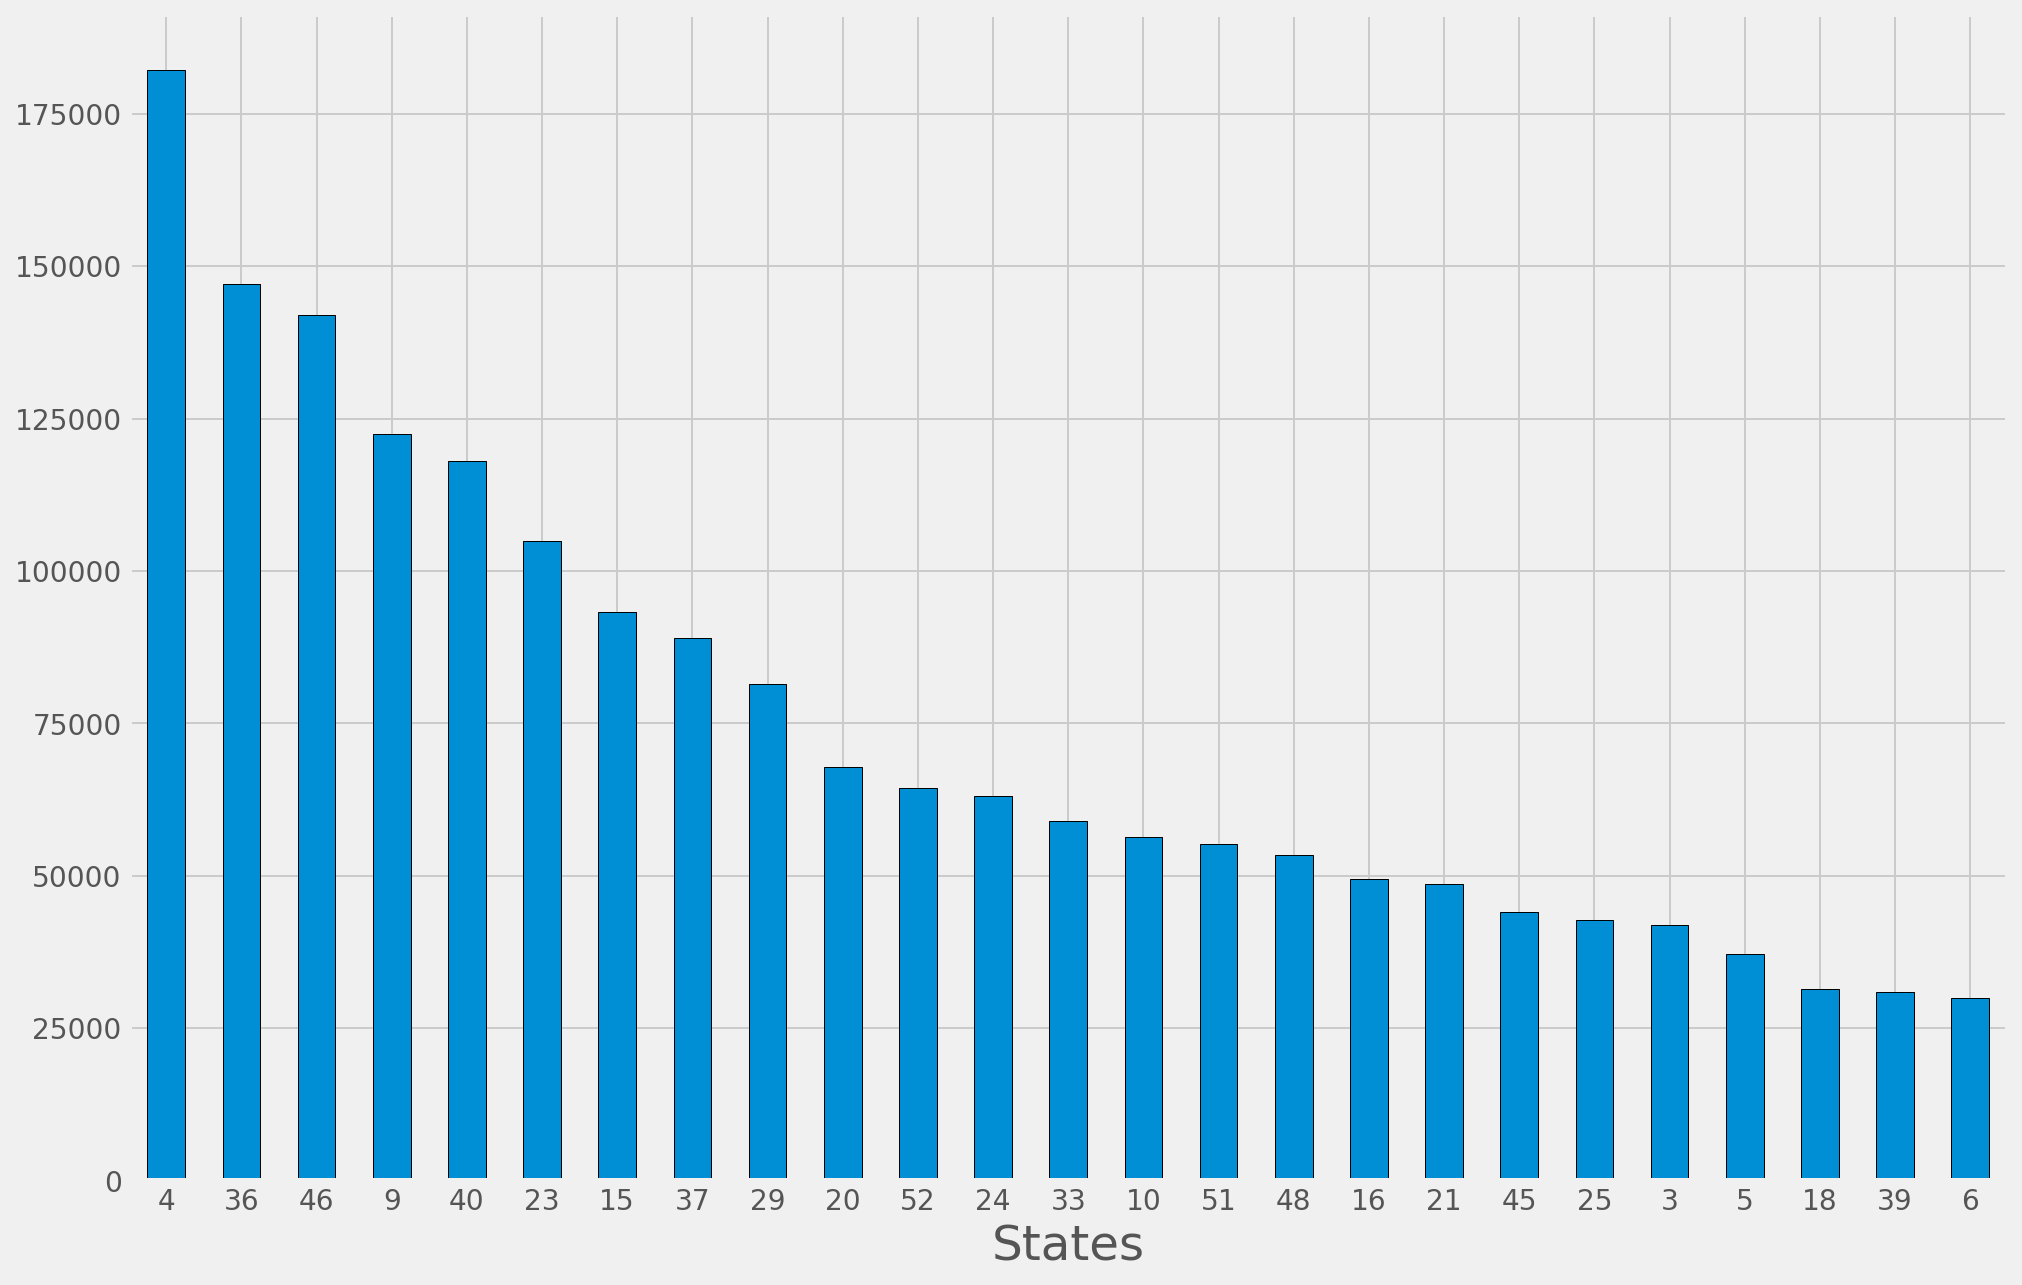

In [150]:
state_count_df.sort_values('count', ascending=False)[:25].plot(kind='bar', figsize=(15,10), 
                                                               edgecolor='black', 
                                                               legend=False,
                                                              title='')
plt.xticks(rotation = 0)
plt.xlabel('States', size='xx-large');

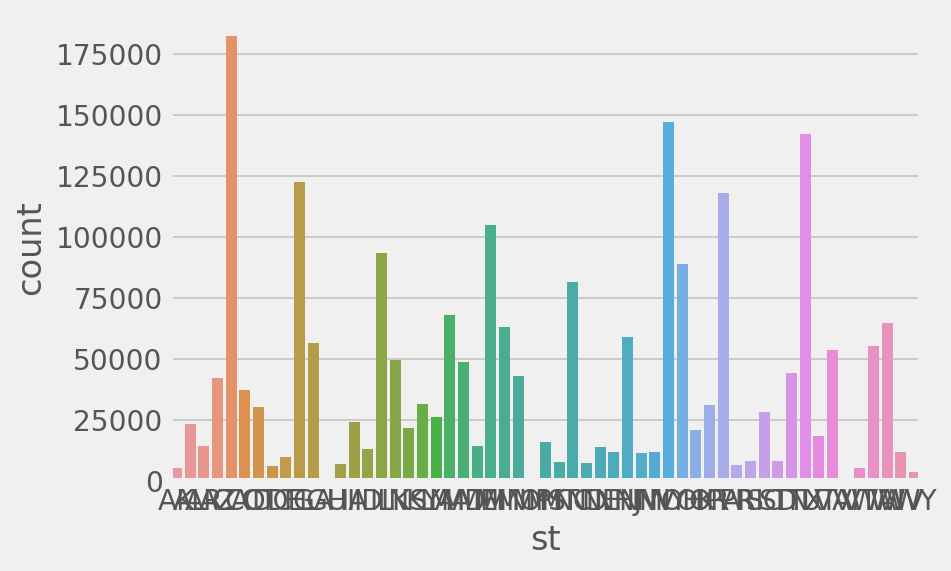

In [147]:
import seaborn as sns

sns.barplot('st', y='count', data=state_count_df)